<a href="https://colab.research.google.com/github/veapasichnyk/Support-Vector-Machine-SVM-for-Classification-Codveda-Internship/blob/main/Support_Vector_Machine_(SVM)_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Support Vector Machine (SVM) for Classification

###Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import importlib

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

###Preprocessing data

In [ ]:
import preprocessing_churn
importlib.reload(preprocessing_churn)

from preprocessing_churn import preprocess_churn_data_split

###Load data

In [ ]:
df1 = pd.read_csv('churn-bigml-20.csv')
df2 = pd.read_csv('churn-bigml-80.csv')

In [ ]:
df_combined = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df_combined.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
print(df_combined.shape)
print(df_combined.info())
print(df_combined.describe())

(3333, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 

###Preprocessing data

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test, feature_names = preprocess_churn_data_split(
    df_combined, scaler_numeric=False
)

###SVM

In [ ]:
kernels = ["linear", "rbf"]
results = {}

for k in kernels:
    svm = SVC(kernel=k, class_weight="balanced", probability=True, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_val)
    y_proba = svm.predict_proba(X_val)[:, 1]

    results[k] = {
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "AUC": roc_auc_score(y_val, y_proba),
        "Model": svm
    }

In [ ]:
#Print performance
for k, res in results.items():
    print(f"\n===== Kernel: {k.upper()} =====")
    print(f"Accuracy : {res['Accuracy']:.4f}")
    print(f"Precision: {res['Precision']:.4f}")
    print(f"Recall   : {res['Recall']:.4f}")
    print(f"AUC      : {res['AUC']:.4f}")
    print("Classification Report:\n", classification_report(y_val, res["Model"].predict(X_val)))


===== Kernel: LINEAR =====
Accuracy : 0.7571
Precision: 0.3367
Recall   : 0.6907
AUC      : 0.7736
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.77      0.84       570
           1       0.34      0.69      0.45        97

    accuracy                           0.76       667
   macro avg       0.64      0.73      0.65       667
weighted avg       0.85      0.76      0.79       667


===== Kernel: RBF =====
Accuracy : 0.8036
Precision: 0.3607
Recall   : 0.4536
AUC      : 0.6502
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       570
           1       0.36      0.45      0.40        97

    accuracy                           0.80       667
   macro avg       0.63      0.66      0.64       667
weighted avg       0.82      0.80      0.81       667



In [ ]:
#Final evaluation on test set (best kernel)
best_kernel = max(results, key=lambda k: results[k]["AUC"])
best_model = results[best_kernel]["Model"]

y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]

print(f"\n===== Test Evaluation ({best_kernel.upper()} kernel) =====")
print(f"Accuracy : {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_test):.4f}")
print(f"AUC      : {roc_auc_score(y_test, y_proba_test):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_test))


===== Test Evaluation (LINEAR kernel) =====
Accuracy : 0.7421
Precision: 0.3318
Recall   : 0.7629
AUC      : 0.8205
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.74      0.83       570
           1       0.33      0.76      0.46        97

    accuracy                           0.74       667
   macro avg       0.64      0.75      0.65       667
weighted avg       0.86      0.74      0.78       667



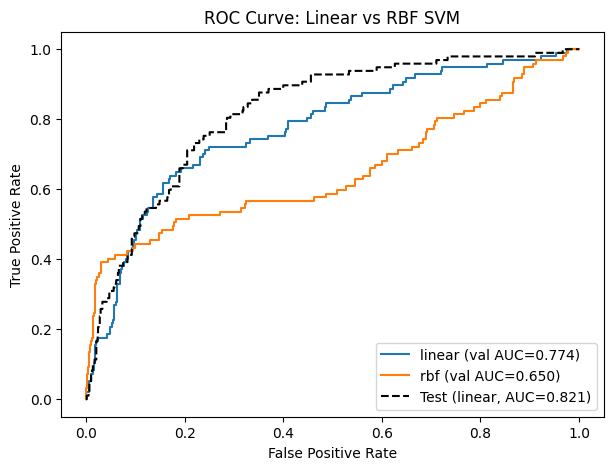

In [ ]:
# ROC curve (val vs test)
plt.figure(figsize=(7,5))
for k, res in results.items():
    fpr, tpr, _ = roc_curve(y_val, res["Model"].predict_proba(X_val)[:,1])
    plt.plot(fpr, tpr, label=f"{k} (val AUC={res['AUC']:.3f})")

fpr, tpr, _ = roc_curve(y_test, y_proba_test)
plt.plot(fpr, tpr, 'k--', label=f"Test ({best_kernel}, AUC={roc_auc_score(y_test, y_proba_test):.3f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Linear vs RBF SVM")
plt.legend()
plt.show()

- Linear SVM (blue, val AUC=0.774)

Performs quite well on validation. Curve rises above the diagonal, showing good separability.

- RBF SVM (orange, val AUC=0.650)

Clearly underperforms → the curve is closer to diagonal line, AUC is much lower.

- Linear SVM on Test (black dashed, AUC=0.821)

Even better than validation → model generalizes well! This confirms that linear kernel is the best choice for my churn dataset.